Personalized Amazon Product Recommendation System
============================================================


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ratings_Electronics (1).csv',header=None)
df.columns =['userid','productid','ratings','timestramp']
df.drop(['timestramp'],axis=1,inplace=True)
df

,userid,productid,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [3]:
# filtering dataset

# since we are working on a recommendation model, we filter dataset by:
# 1) users who have given atleast 50 ratings
# 2) products that have atleast 5 ratings

user_ratings_count = df['userid'].value_counts()
valid_users = user_ratings_count[user_ratings_count >= 50].index
df_filtered_users = df[df['userid'].isin(valid_users)]

product_ratings_count = df_filtered_users['productid'].value_counts()
valid_products = product_ratings_count[product_ratings_count >= 5].index
df_filtered = df_filtered_users[df_filtered_users['productid'].isin(valid_products)]
df_filtered


,userid,productid,ratings
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0
...,...,...,...
7824423,A34BZM6S9L7QI4,B00LGQ6HL8,5.0
7824424,A1G650TTTHEAL5,B00LGQ6HL8,5.0
7824425,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0


In [4]:
df_filtered.head()

,userid,productid,ratings
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [5]:
df_filtered.tail()

,userid,productid,ratings
7824423,A34BZM6S9L7QI4,B00LGQ6HL8,5.0
7824424,A1G650TTTHEAL5,B00LGQ6HL8,5.0
7824425,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0


In [6]:
df_filtered.shape

(65290, 3)

In [7]:
df_filtered.isna().sum()

,0
userid,0
productid,0
ratings,0


In [8]:
df_filtered.dtypes

,0
userid,object
productid,object
ratings,float64


Descriptive statistics
============================

In [9]:
# basic descriptive statistics for ratings

ratings_stats = df_filtered['ratings'].describe()
ratings_stats

,ratings
count,65290.000000
mean,4.294808
std,0.988915
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# descriptive statistics of user id

userid_stats = df_filtered['userid'].describe()
userid_stats

,userid
count,65290
unique,1540
top,ADLVFFE4VBT8
freq,295


In [11]:
# descriptive statistics of product id

productid_stats = df_filtered['productid'].describe()
productid_stats

,productid
count,65290
unique,5689
top,B0088CJT4U
freq,206


In [12]:
# top 5 users based on number of ratings

top_users = df_filtered['userid'].value_counts().head(5)
top_users

,count
userid,
ADLVFFE4VBT8,295
A3OXHLG6DIBRW8,230
A1ODOGXEYECQQ8,217
A36K2N527TXXJN,212
A25C2M3QF9G7OQ,203



# Plots




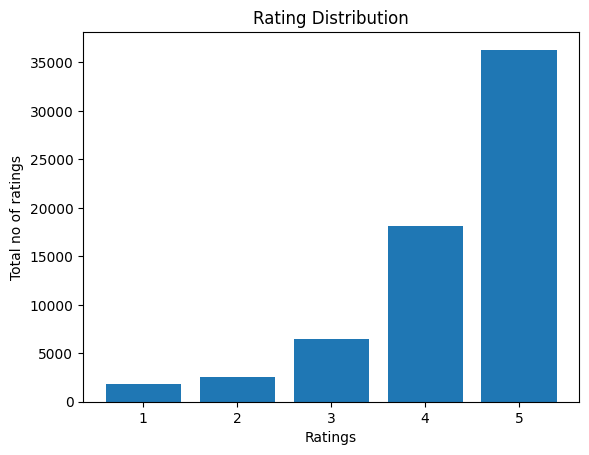

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# rating distribution

plt.bar(df_filtered['ratings'].value_counts().index,df_filtered['ratings'].value_counts())
plt.xlabel('Ratings')
plt.ylabel('Total no of ratings')
plt.title('Rating Distribution')
plt.show()

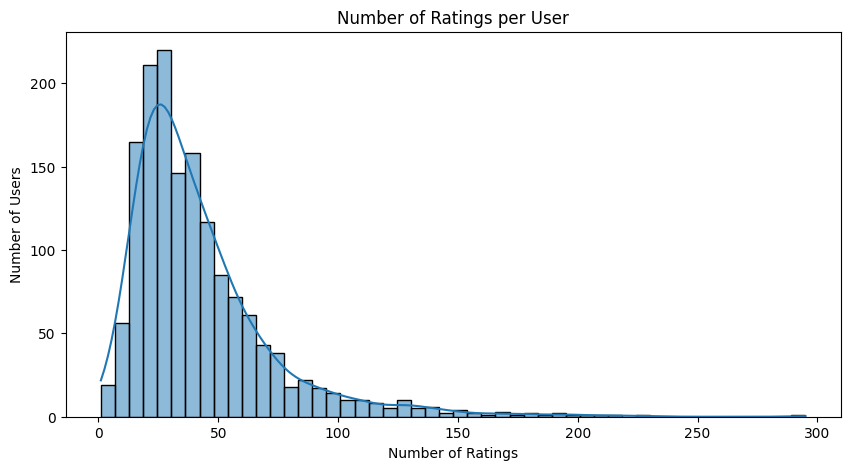

In [15]:
# Number of ratings per user


# Count of ratings per user
user_rating_counts = df_filtered['userid'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

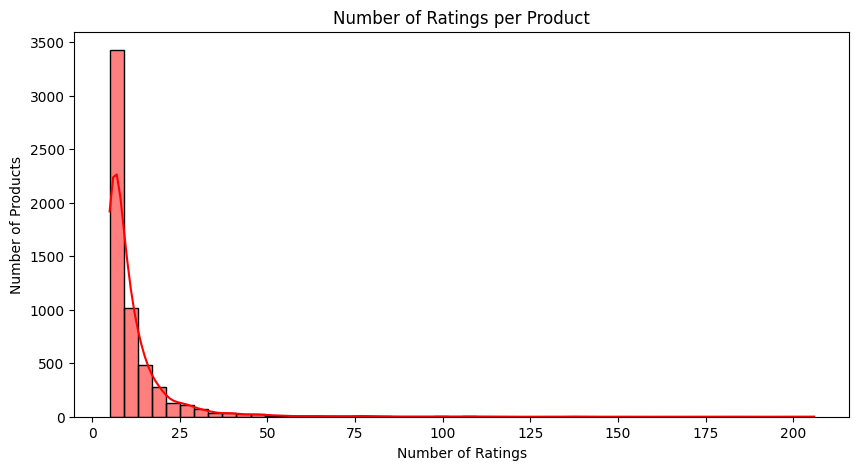

In [18]:
# Number of ratings per product


product_rating_counts = df_filtered['productid'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(product_rating_counts, bins=50, kde=True, color='red')
plt.title('Number of Ratings per Product')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Products')
plt.show()

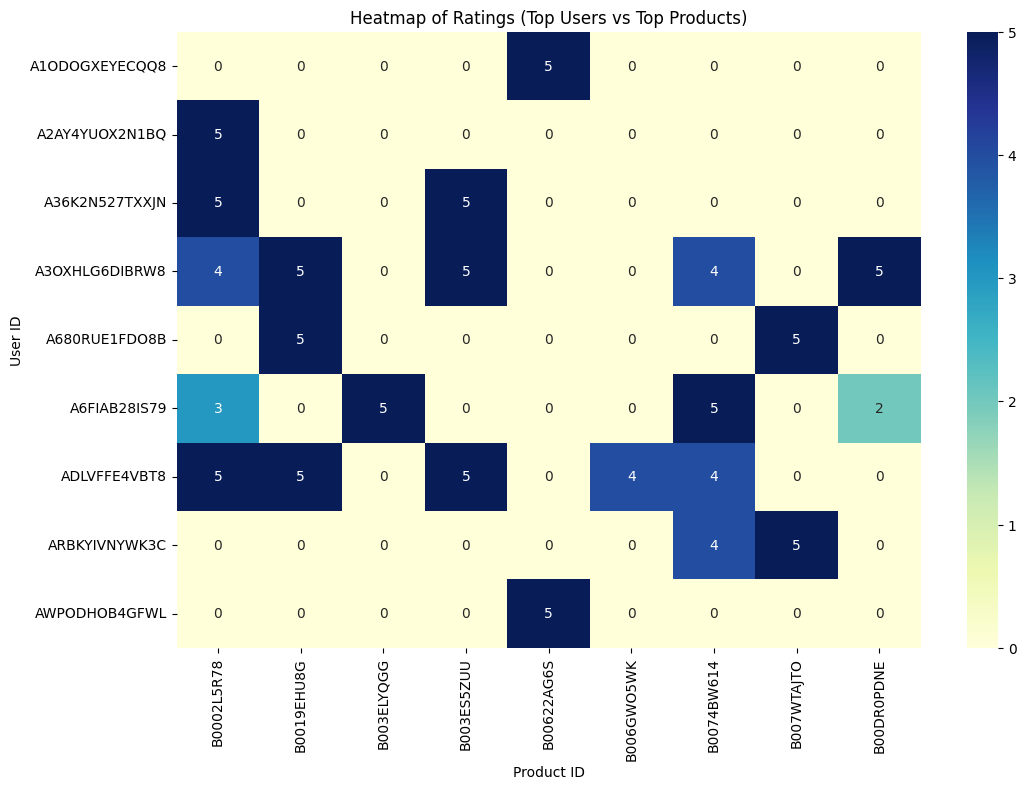

In [23]:
# heatmap of ratings (top users vs top products)



# Select top 10 users with most ratings
top_users = df['userid'].value_counts().head(10).index

# Select top 10 most rated products
top_products = df['productid'].value_counts().head(10).index

# Filter dataset
filtered_df = df[df['userid'].isin(top_users) & df['productid'].isin(top_products)]

# Pivot and plot
heatmap_data = filtered_df.pivot_table(index='userid', columns='productid', values='ratings').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Ratings (Top Users vs Top Products)')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()

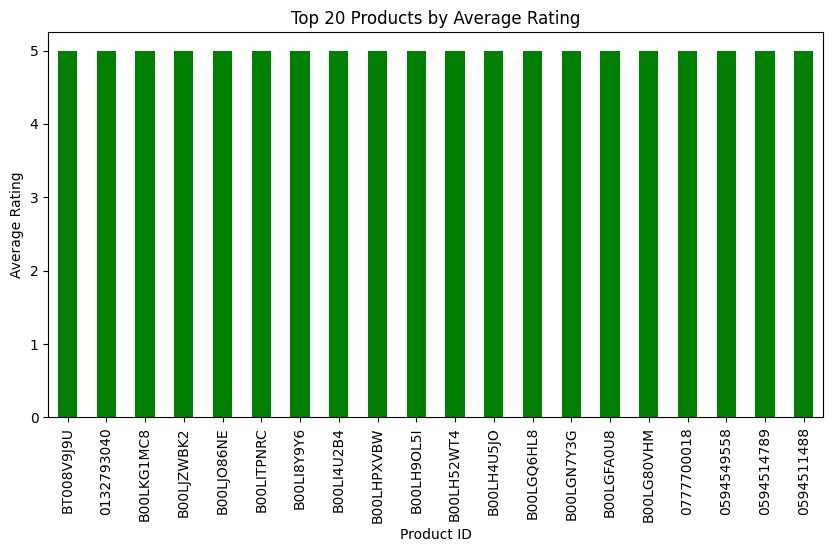

In [21]:
# Average rating per product

avg_rating_per_product = df.groupby('productid')['ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_rating_per_product.head(20).plot(kind='bar', color='green')
plt.title('Top 20 Products by Average Rating')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


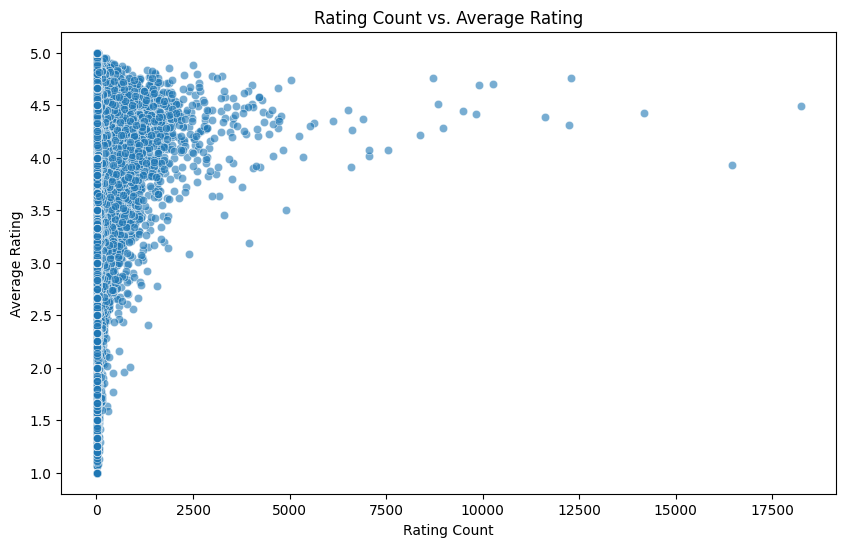

In [22]:
# rating count vs average rating

rating_stats = df.groupby('productid').agg({'ratings': ['mean', 'count']})
rating_stats.columns = ['avg_rating', 'rating_count']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rating_stats, x='rating_count', y='avg_rating', alpha=0.6)
plt.title('Rating Count vs. Average Rating')
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.show()

Model 1. Popularity-Based Recommendation System
=====================================================

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split data into train and test sets (80% training, 30% testing)
train_data, test_data = train_test_split(df_filtered, test_size=0.30, random_state=42)

# Reset index for both train and test data
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (45703, 3)
Test Data Shape: (19587, 3)


In [ ]:
# Popularity-based model using average ratings from training data

popularity_model_avg_rating = train_data.groupby('productid')['ratings'].mean().sort_values(ascending=False).head(10)
print("Top 10 Products by Average Rating:")
print(popularity_model_avg_rating)

Top 10 Products by Average Rating:
productid
B00LGQ6HL8    5.0
B003QHXZM4    5.0
B003QSG0HK    5.0
B008HK50ZA    5.0
B008HK3QII    5.0
B003QVWJM2    5.0
B008GVL9YQ    5.0
B003RRFWRY    5.0
B008ET9VY0    5.0
B000WNG0MW    5.0
Name: ratings, dtype: float64


In [ ]:
# Popularity-based model using number of ratings from training data

popularity_model_num_ratings = train_data.groupby('productid')['ratings'].count().sort_values(ascending=False).head(10)
print("Top 10 Products by Number of Ratings:")
print(popularity_model_num_ratings)

Top 10 Products by Number of Ratings:
productid
B003ES5ZUU    133
B0088CJT4U    132
B007WTAJTO    114
B000N99BBC    109
B00829TIEK    102
B008DWCRQW     99
B00829THK0     98
B004CLYEDC     92
B002R5AM7C     87
B004T9RR6I     81
Name: ratings, dtype: int64


In [ ]:
# Get the top 10 products from the popularity model (based on avg rating or number of ratings)
top_10_products_avg = popularity_model_avg_rating.index.tolist()
top_10_products_num = popularity_model_num_ratings.index.tolist()

# Test the hit rate: Check if the top 10 recommended products are present in the test set
def calculate_hit_rate(top_10_products, test_data):
    hits = 0
    total_users = test_data['userid'].nunique()

    for user in test_data['userid'].unique():
        user_rated_products = test_data[test_data['userid'] == user]['productid'].tolist()
        if any(product in user_rated_products for product in top_10_products):
            hits += 1

    hit_rate = hits / total_users
    return hit_rate

# Hit Rate for Popularity Based on Average Rating
hit_rate_avg = calculate_hit_rate(top_10_products_avg, test_data)
print(f"Hit Rate (Average Rating): {hit_rate_avg * 100:.2f}%")

# Hit Rate for Popularity Based on Number of Ratings
hit_rate_num = calculate_hit_rate(top_10_products_num, test_data)
print(f"Hit Rate (Number of Ratings): {hit_rate_num * 100:.2f}%")

Hit Rate (Average Rating): 1.18%
Hit Rate (Number of Ratings): 24.43%


Model 2. Collaborative Filtering
====================================


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import accuracy


# Step 1: Load the data into the Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_filtered[['userid', 'productid', 'ratings']], reader)

# Step 2: Train-test split
trainset, testset = train_test_split(data, test_size=0.30)

# Step 3: User-User Collaborative Filtering model (KNNBasic)
sim_options = {
    'name': 'cosine',  # Can also try 'pearson'
    'user_based': True  # User-user based collaborative filtering
}
user_user_cf = KNNBasic(sim_options=sim_options)

# Step 4: Train the model
user_user_cf.fit(trainset)

# Step 5: Predict on the testset
predictions_user_user = user_user_cf.test(testset)

# Step 6: Evaluate the model
print("User-User Collaborative Filtering Model Performance:")
rmse_user_user = accuracy.rmse(predictions_user_user)
mae_user_user = accuracy.mae(predictions_user_user)

# Cross-validation for more robust evaluation
cross_validate(user_user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
User-User Collaborative Filtering Model Performance:
RMSE: 1.0259
MAE:  0.7232
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0328  1.0101  1.0086  1.0319  1.0019  1.0171  0.0128  
MAE (testset)     0.7261  0.7162  0.7147  0.7226  0.7114  0.7182  0.0054  
Fit time          0.22    0.21    0.13    0.16    0.22    0.19    0.03    
Test time         0.32    0.32    0.32    0.32    0.33    0.32    0.00    


{'test_rmse': array([1.03281363, 1.01013559, 1.00857995, 1.0319022 , 1.00192676]),
 'test_mae': array([0.72605926, 0.71616865, 0.71466218, 0.72261655, 0.71135623]),
 'fit_time': (0.2153186798095703,
  0.20788073539733887,
  0.13066768646240234,
  0.1609797477722168,
  0.2168440818786621),
 'test_time': (0.32181715965270996,
  0.31746482849121094,
  0.32334208488464355,
  0.31951189041137695,
  0.32593822479248047)}

In [ ]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'k': [10, 20, 30, 40, 50],  # Number of nearest neighbors
    'min_k': [1, 3, 5],  # Minimum number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson', 'msd'],  # Similarity metrics to try
        'user_based': [True],  # Ensure we are using user-user similarity
    }
}

# Initialize the KNNBasic algorithm
knn_algo = KNNBasic()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
grid_search.fit(data)  # Assuming 'data' is your surprise Dataset

# Print the best score and corresponding hyperparameters
print("Best RMSE:", grid_search.best_score['rmse'])
print("Best MAE:", grid_search.best_score['mae'])
print("Best Hyperparameters:", grid_search.best_params['rmse'])

# Train the final model using the best hyperparameters
best_knn_algo = grid_search.best_estimator['rmse']

# Fit on the trainset
trainset = data.build_full_trainset()
best_knn_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [ ]:
# Step 1: Item-Item Collaborative Filtering model (KNNBasic)
sim_options = {
    'name': 'cosine',  # Can also try 'pearson'
    'user_based': False  # Item-item based collaborative filtering
}
item_item_cf = KNNBasic(sim_options=sim_options)

# Step 2: Train the model
item_item_cf.fit(trainset)

# Step 3: Predict on the testset
predictions_item_item = item_item_cf.test(testset)

# Step 4: Evaluate the model
print("Item-Item Collaborative Filtering Model Performance:")
rmse_item_item = accuracy.rmse(predictions_item_item)
mae_item_item = accuracy.mae(predictions_item_item)

# Cross-validation for more robust evaluation
cross_validate(item_item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Item-Item Collaborative Filtering Model Performance:
RMSE: 0.9034
MAE:  0.6703
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0279  1.0198  1.0003  1.0248  1.0140  1.0174  0.0098  
MAE (testset)     0.7232  0.7193  0.7074  0.7205  0.7123  0.7165  0.0058  
Fit time          1.97    1.86    1.99    2.21    1.87    1.98    0.12    
Test time         0.94    0.80    1.27    0.81    0.79    0.92    0.18    


{'test_rmse': array([1.02794676, 1.01977656, 1.00026081, 1.0248283 , 1.01403348]),
 'test_mae': array([0.72318904, 0.71925098, 0.7074415 , 0.72051523, 0.7122539 ]),
 'fit_time': (1.970560073852539,
  1.863389492034912,
  1.9914636611938477,
  2.2059805393218994,
  1.8696165084838867),
 'test_time': (0.9375145435333252,
  0.7966163158416748,
  1.265617847442627,
  0.806225061416626,
  0.7857151031494141)}

In [ ]:
print("\nComparing Models:")
print(f"User-User CF RMSE: {rmse_user_user}, MAE: {mae_user_user}")
print(f"Item-Item CF RMSE: {rmse_item_item}, MAE: {mae_item_item}")

# Check which model performs better based on RMSE
if rmse_user_user < rmse_item_item:
    print("\nUser-User Collaborative Filtering performs better based on RMSE.")
else:
    print("\nItem-Item Collaborative Filtering performs better based on RMSE.")


Comparing Models:
User-User CF RMSE: 1.0259489060988085, MAE: 0.7231924048262748
Item-Item CF RMSE: 0.9034202498641224, MAE: 0.6702574569965878

Item-Item Collaborative Filtering performs better based on RMSE.


Model 3. Matrix factorization
========================================

In [ ]:


from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import accuracy

# Prepare the data for the surprise library
reader = Reader(rating_scale=(1, 5))  # Set the rating scale
data = Dataset.load_from_df(df_filtered[['userid', 'productid', 'ratings']], reader)

# Split the data into train and test sets (80% train, 20% test)
trainset, testset = train_test_split(data, test_size=0.2)

# Use the SVD algorithm for matrix factorization
model = SVD()

# Train the model
model.fit(trainset)

# Test the model on the testset
predictions = model.test(testset)

# Compute RMSE and MAE to evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Optionally: Cross-validate the model using 5-fold CV
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 0.8961
MAE:  0.6552
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9068  0.8933  0.9156  0.8926  0.9012  0.9019  0.0087  
MAE (testset)     0.6622  0.6535  0.6726  0.6624  0.6606  0.6623  0.0061  
Fit time          0.98    1.83    4.23    2.22    1.78    2.21    1.09    
Test time         0.11    0.35    0.65    0.17    0.08    0.27    0.21    


{'test_rmse': array([0.90684261, 0.89327356, 0.91562894, 0.89261017, 0.90118846]),
 'test_mae': array([0.66224972, 0.65348694, 0.67261897, 0.66239878, 0.66057426]),
 'fit_time': (0.9754338264465332,
  1.8286302089691162,
  4.231661796569824,
  2.223633289337158,
  1.783470630645752),
 'test_time': (0.1092226505279541,
  0.3498661518096924,
  0.6514327526092529,
  0.16772150993347168,
  0.07993078231811523)}

In [ ]:
# Hyperparameter tuning


from surprise import SVD
from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'reg_all': [0.02, 0.1, 0.2],  # Regularization term
    'lr_all': [0.005, 0.01, 0.02]  # Learning rate
}

# Use GridSearchCV to find the best combination of hyperparameters
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# Fit to the data
gs.fit(data)

# Print the best score and parameters
print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best hyperparameters: {gs.best_params['rmse']}")

# Train the final model with the best parameters
best_svd_model = gs.best_estimator['rmse']
best_svd_model.fit(trainset)

# Test the model on the testset
predictions = best_svd_model.test(testset)

# Evaluate the final model
accuracy.rmse(predictions)
accuracy.mae(predictions)

Best RMSE: 0.8987568389970244
Best hyperparameters: {'n_factors': 100, 'reg_all': 0.2, 'lr_all': 0.01}
RMSE: 0.8873
MAE:  0.6522


0.652215482864538

In [ ]:


# Recommend top N products for a specific user
def get_top_n_recommendations(model, user_id, n=5):
    # Get all product IDs from the training set
    all_product_ids = set([trainset.to_raw_iid(iid) for iid in range(trainset.n_items)])

    # Get the products that the user has already rated
    inner_user_id = trainset.to_inner_uid(user_id)
    rated_products = set([trainset.to_raw_iid(iid) for (iid, _) in trainset.ur[inner_user_id]])

    # Find the products that the user has not rated yet
    products_to_predict = all_product_ids - rated_products

    # Predict the ratings for all unrated products
    predictions = [model.predict(user_id, product) for product in products_to_predict]

    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N products with the highest predicted ratings
    top_n = predictions[:n]

    # Extract product IDs from the top N predictions
    recommended_products = [pred.iid for pred in top_n]

    return recommended_products

# Example usage
user_id = 'ADLVFFE4VBT8'  # Replace with the user ID you want to get recommendations for
recommended_products = get_top_n_recommendations(model, user_id, n=5)

print(f"Recommended products for user {user_id}: {recommended_products}")

Recommended products for user ADLVFFE4VBT8: ['B00GO4GMAI', 'B003L1ZYZ6', 'B009APBY0G', 'B0033PRWSW', 'B00G6IJ5NI']
